In [237]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
import datetime


In [238]:
data = pd.read_csv(r'C:\Users\Maheen\Downloads\BreadBasket_DMS (2) (1).csv')

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [240]:
print("Total Items: ",len(data.Item.unique()))

Total Items:  95


In [241]:
print("Total unique Transaction IDs: ",len(data.Transaction.unique()))

Total unique Transaction IDs:  9531


In [242]:

data = data[data.Item != 'NONE']
data.loc[data["Item"] == "NONE",:].tail(10)

,Date,Time,Transaction,Item


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


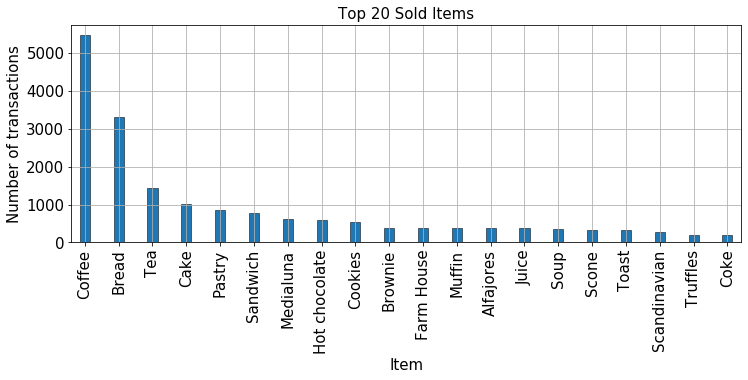

In [244]:
fig, ax=plt.subplots(figsize=(12,4))
data['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.3,edgecolor='k',align='center',linewidth=0.5)
plt.xlabel('Item',fontsize=15)
plt.ylabel('Number of transactions',fontsize=15)
ax.tick_params(labelsize=15)
plt.title('Top 20 Sold Items',fontsize=15)
plt.grid()
plt.ioff()


In [245]:
data['datetime'] = pd.to_datetime(data['Date']+" "+data['Time'])

In [246]:
data['Weekday'] = data['datetime'].dt.weekday

In [247]:
data['Hours'] = data['datetime'].dt.hour

In [248]:
data['Month'] = data['datetime'].dt.month

In [249]:
data['Week'] = data['datetime'].dt.week

In [250]:
df1=data[['Weekday', 'Hours', 'Month', 'Week']]

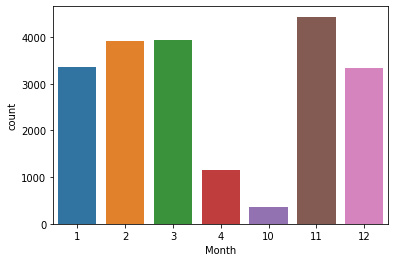

In [251]:
sns.countplot(x='Month',data=df1)

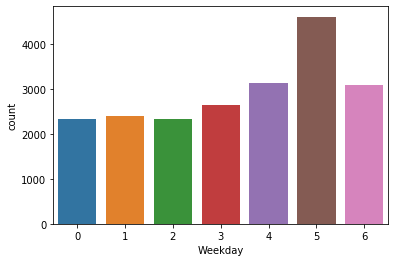

In [252]:
sns.countplot(x='Weekday',data=df1)

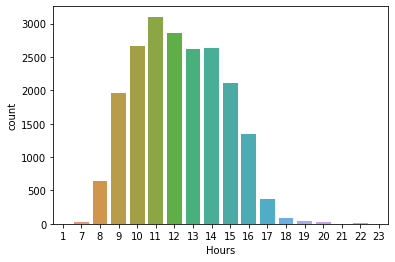

In [253]:
sns.countplot(x='Hours',data=df1)

In [254]:
earlyMorning = data.loc[(data['Time']>='06:00:00')&(data['Time']<'09:00:00')]
lateMorning = data.loc[(data['Time']>='09:00:00')&(data['Time']<'12:00:00')]
earlyAfternoon = data.loc[(data['Time']>='12:00:00')&(data['Time']<'15:00:00')]
lateAfternoon = data.loc[(data['Time']>='15:00:00')&(data['Time']<'18:00:00')]
night = data.loc[(data['Time']>='18:00:00')&(data['Time']<'21:00:00')]
hourlySales = {'earlyMorning': len(earlyMorning), 'lateMorning': len(lateMorning), 'earlyAfternoon': len(earlyAfternoon),'lateAfternoon': len(lateAfternoon),'night': len(night)}

print(" early morning sales: ", hourlySales['earlyMorning'])
print(" late morning sales : ", hourlySales['lateMorning'])
print(" early afternoon sales : ", hourlySales['earlyAfternoon'])
print(" late afternoon sales : ", hourlySales['lateAfternoon'])
print(" night sales: ", hourlySales['night'])

 early morning sales:  669
 late morning sales :  7734
 early afternoon sales :  8111
 late afternoon sales :  3826
 night sales:  152


In [255]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [256]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [257]:
df2 = data.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [258]:
df2.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
df2 = df2.applymap(encode_units)

In [260]:
frequent_itemsets = apriori(df2, min_support=0.02, use_colnames=True)
print('Items with min 2% support are:','\n', frequent_itemsets)

Items with min 2% support are: 
      support                 itemsets
0   0.036344              (Alfajores)
1   0.327205                  (Bread)
2   0.040042                (Brownie)
3   0.103856                   (Cake)
4   0.478394                 (Coffee)
5   0.054411                (Cookies)
6   0.039197             (Farm House)
7   0.058320          (Hot chocolate)
8   0.038563                  (Juice)
9   0.061807              (Medialuna)
10  0.038457                 (Muffin)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
13  0.029054           (Scandinavian)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
16  0.142631                    (Tea)
17  0.033597                  (Toast)
18  0.020285               (Truffles)
19  0.023349            (Bread, Cake)
20  0.090016          (Bread, Coffee)
21  0.029160          (Bread, Pastry)
22  0.028104             (Bread, Tea)
23  0.054728           (Coffee, Cake)
24  0.023772     

In [261]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749


In [262]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.22)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
12,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
16,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
18,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


C:\Users\Maheen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Maheen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


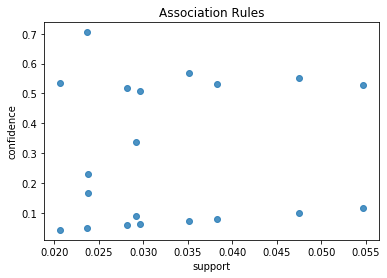

In [263]:
support = rules.as_matrix(columns=['support'])
confidence = rules.as_matrix(columns=['confidence'])
import seaborn as sns

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]
    
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)